# Visualització gràfica Multiples variables

- **Exercici 1**

Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

- **Exercici 2**

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

- **Exercici 3**

Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

# Tips

In [66]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [67]:
## Load Dataset
tips = sns.load_dataset("tips")

In [68]:
## Sample
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
132,11.17,1.50,Female,No,Thur,Lunch,2
205,16.47,3.23,Female,Yes,Thur,Lunch,3
181,23.33,5.65,Male,Yes,Sun,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
234,15.53,3.00,Male,Yes,Sat,Dinner,2


In [69]:
## Percentage
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
230,24.01,2.00,Male,Yes,Sat,Dinner,4,9.09
96,27.28,4.00,Male,Yes,Fri,Dinner,2,17.18
205,16.47,3.23,Female,Yes,Thur,Lunch,3,24.40
209,12.76,2.23,Female,Yes,Sat,Dinner,2,21.18
128,11.38,2.00,Female,No,Thur,Lunch,2,21.32


In [70]:
## Inf
print ("Shape:", tips.shape)
print("Dim:", tips.ndim)
print("Columnas:", tips.columns)

Shape: (244, 8)
Dim: 2
Columnas: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct'], dtype='object')


In [71]:
## Data Types
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
tip_pct        float64
dtype: object

In [72]:
## Nulls
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [73]:
## Describe
tips.describe(include='all').round(3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


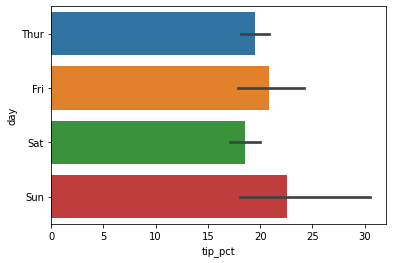

In [74]:
## BarPlot
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

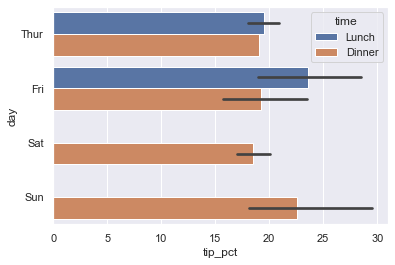

In [75]:
## BarPlot
sns.set(style="darkgrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()

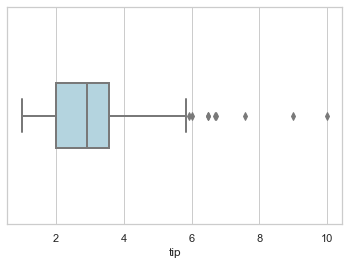

In [76]:
## BoxPlot
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, linewidth=2, width=0.3)

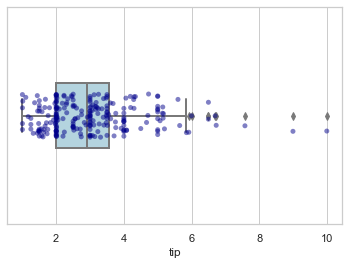

In [77]:
## BoxPlot
sns.set(style="whitegrid")
ax = sns.boxplot(x="tip", data=tips,  color='lightblue', fliersize=5, linewidth=2, width=0.3)
ax = sns.stripplot(x=tips["tip"], color='darkblue', alpha= 0.5)

### Una variable numérica: `Tip_pct`

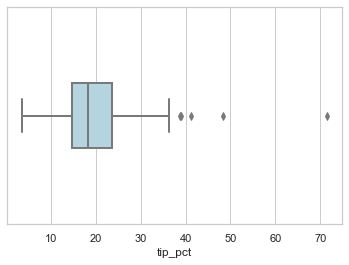

In [78]:
sns.set(style="whitegrid")
sns.boxplot(x="tip_pct", data=tips[tips.tip_pct < 100],  color='lightblue', fliersize=5, linewidth=2 , width=0.3);

### Una variable numérica y una categórica: `Tip_pct` `day`

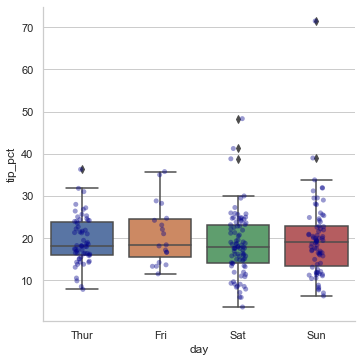

In [79]:
ax = sns.catplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 100]);
ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 100], color='darkblue', alpha= 0.4);

### Una variable numérica y dos categórica: `Tip_pct` `day` `time`

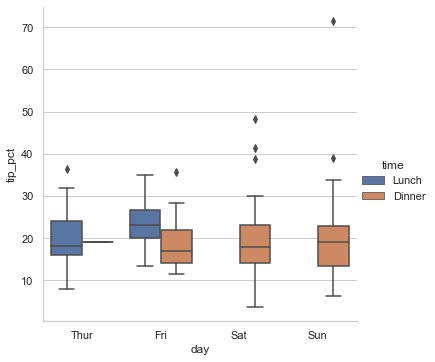

In [80]:
sns.catplot(x='day', y='tip_pct', hue='time', kind = "box", data=tips[tips.tip_pct < 100]);

### Una variable numérica y tres categórica: `Tip_pct` `day` `time` `smoker`

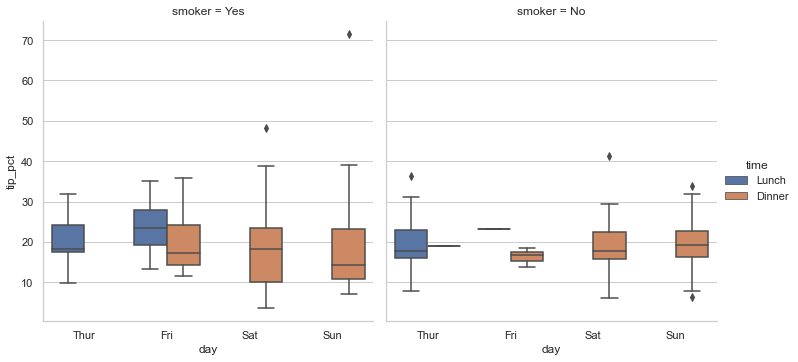

In [81]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='box', data=tips[tips.tip_pct < 100]);

# Movies

In [118]:
## Load Dataset
mcabecera = ['movie_id', 'titulo', 'genero']
movies= pd.read_csv('movies.txt', sep = '::', index_col = 0, header = None, names = mcabecera, engine = "python")
movies.head(5)

,titulo,genero
movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [119]:
## Year
movies["año"] = [re.search("\([\d]{4}\)", x).group() for x in movies["titulo"]]
movies["año"] = [re.search("[\d]{4}", x).group() for x in movies["año"]]

In [120]:
## Titulo
movies["titulo"] = [re.split("\([\d]{4}", x)[0] for x in movies["titulo"]]

In [121]:
## Dummies
movies_dummies = movies["genero"].str.get_dummies(sep="|")

In [122]:
## Join df
movies = movies.join(movies_dummies)
##Sort
movies = movies.sort_values("año")

In [123]:
## Generos
generos = movies.columns[3:]

In [124]:
## Movies
display (movies)

,titulo,genero,año,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
3132,Daddy Long Legs,Comedy,1919,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...",Action|Drama,1919,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2821,Male and Female,Adventure|Drama,1919,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3309,"Dog's Life, A",Comedy,1920,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3231,"Saphead, The",Comedy,1920,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,Space Cowboys,Action|Sci-Fi,2000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3535,American Psycho,Comedy|Horror|Thriller,2000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
3829,Mad About Mambo,Comedy|Romance,2000,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [125]:
## Save
movies.to_csv("movies_clean.csv")

### Plots

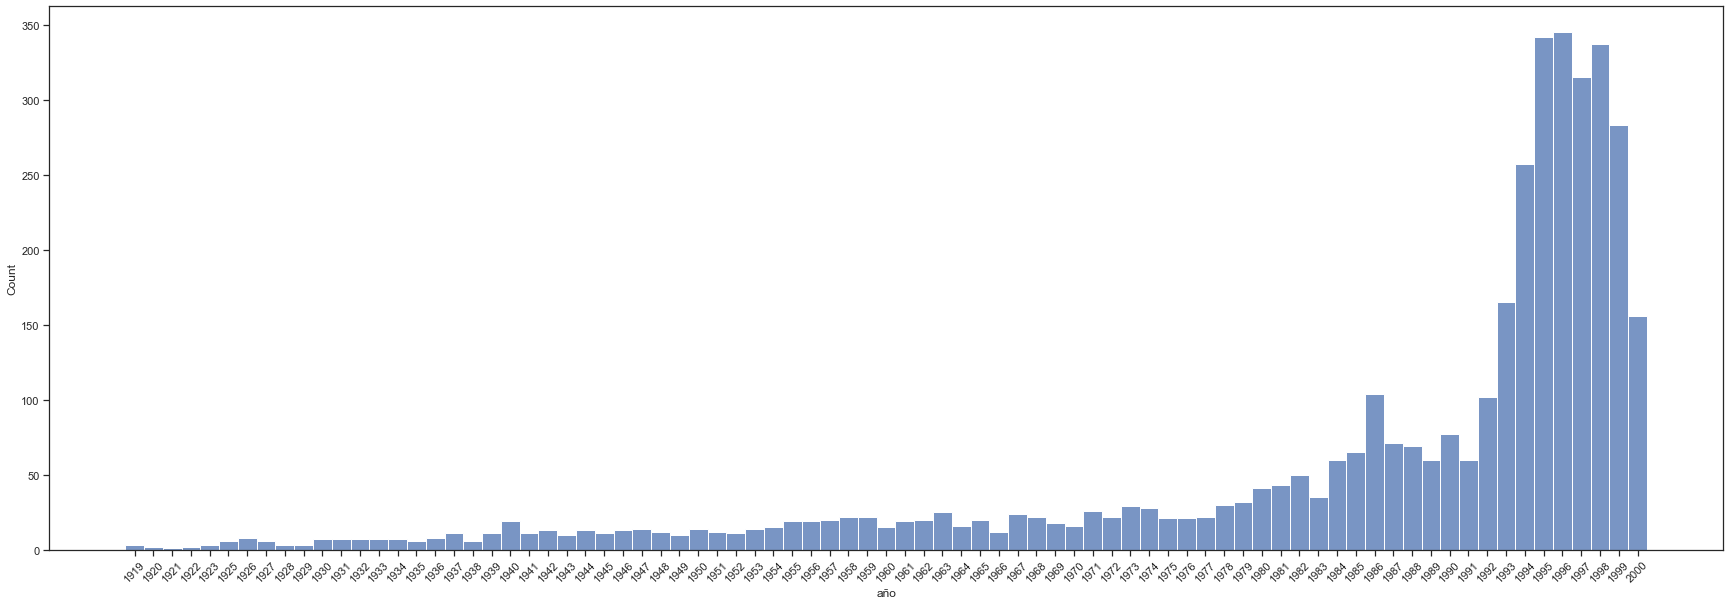

In [126]:
## Histogram year
sns.set_theme(style = "ticks")
fig, axes = plt.subplots(figsize=(30,10));
sns.histplot(movies, x="año", discrete=True, ax = axes);
plt.xticks(rotation=45);

In [127]:
## Los haré con los años más recientes (1992, 2000)
most_movies = ["1992", "1993", "1994", "1995", "1996", "1997", "1998", "1999", "2000"]
df = movies[movies.año.isin(most_movies)]

In [128]:
## Groupby Años
df_groupby = df.groupby("año").sum()
display(df_groupby)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
año,,,,,,,,,,,,,,,,,,
1992,21,3,3,7,37,10,1,38,1,0,12,3,2,14,8,14,3,1
1993,25,10,4,12,47,8,5,81,3,1,9,3,7,18,11,22,5,2
1994,32,15,5,20,96,9,11,121,5,0,13,2,3,37,8,31,7,6
1995,45,25,8,22,89,18,22,158,4,1,16,4,8,50,18,43,12,4
1996,37,22,7,20,115,23,19,150,5,2,12,7,6,48,14,45,8,1
1997,43,22,6,22,98,26,11,139,6,2,10,5,15,52,18,55,10,0
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1
2000,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0


In [129]:
## Suma por generos
df_groupby["#gen"] = df_groupby.sum(axis = 1)

In [130]:
## Añadimos la columna #pelis
df_groupby["#pelis"] = df.groupby("año").count()["titulo"]

In [131]:
## Films Datset
df_groupby = df_groupby.T
display(df_groupby)

año,1992,1993,1994,1995,1996,1997,1998,1999,2000
Action,21,25,32,45,37,43,44,27,19
Adventure,3,10,15,25,22,22,16,7,6
Animation,3,4,5,8,7,6,8,7,8
Children's,7,12,20,22,20,22,18,11,9
Comedy,37,47,96,89,115,98,112,103,69
Crime,10,8,9,18,23,26,25,12,8
Documentary,1,5,11,22,19,11,18,15,8
Drama,38,81,121,158,150,139,166,130,55
Fantasy,1,3,5,4,5,6,2,2,1
Film-Noir,0,1,0,1,2,2,3,0,0


In [132]:
## Save
df_groupby.to_csv("movies_byYear.csv")

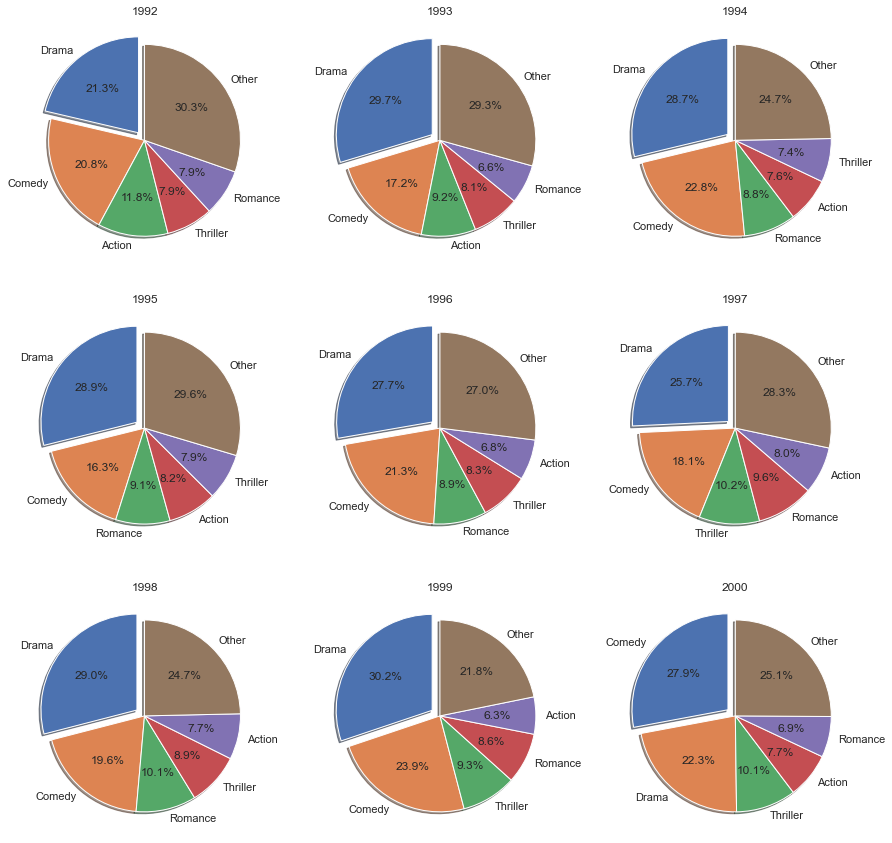

In [133]:
## Pie chart of Gen
fig, axes = plt.subplots(3, 3, figsize=(15,15));

for ii in enumerate(axes.flatten()):
    
    year = df_groupby.columns[ii[0]]
    column = df_groupby[year][:-2]
    column = column.sort_values(ascending = False)

    main_gen = list(column.head(5))
    other_gen = column.tail(len(column)-5).sum()
    main_gen.append(other_gen)

    main_lab = list(column.head(5).index)
    main_lab.append("Other")
    
    ii[1].set_title(year)
    ii[1].pie(main_gen, labels = main_lab, explode = [0.1, 0, 0, 0, 0, 0], autopct='%1.1f%%',
        shadow=True, startangle=90)

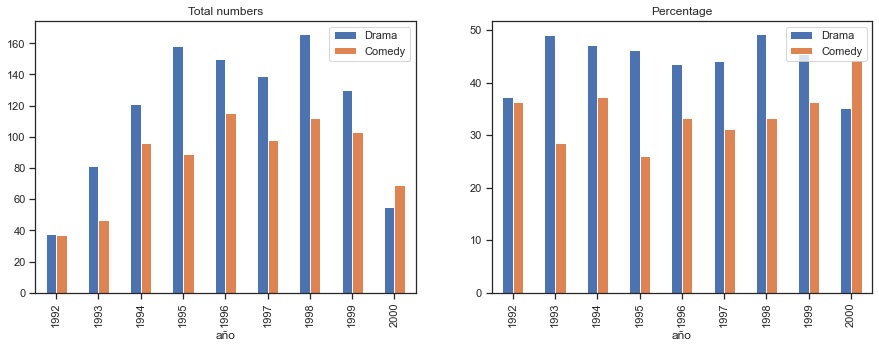

In [134]:
## Fight between first and second
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5));

df_groupby.T.plot(y=["Drama", "Comedy"], kind="bar", ax = ax1);
ax1.set_title("Total numbers");
ax1.legend(loc = "upper right")

(df_groupby.iloc[0:-2].div(df_groupby.iloc[-1])*100).T.plot(y=["Drama", "Comedy"], kind="bar", ax = ax2);
ax2.set_title("Percentage");
ax2.legend(loc = "upper right");

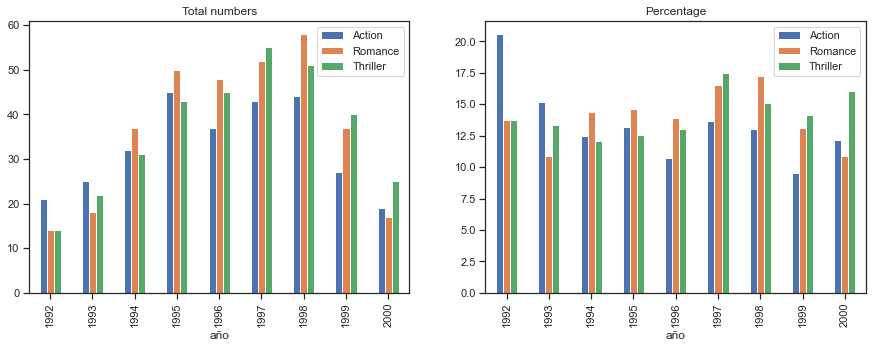

In [135]:
## Fight Between third to fiveth position
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5));

df_groupby.T.plot(y=["Action", "Romance", "Thriller"], kind="bar", ax = ax1);
ax1.set_title("Total numbers");
ax1.legend(loc = "upper right");

(df_groupby.iloc[0:-2].div(df_groupby.iloc[-1])*100).T.plot(y=["Action", "Romance", "Thriller"], kind="bar", ax = ax2);
ax2.set_title("Percentage");
ax2.legend(loc = "upper right");

In [136]:
## Heat Map generos 2 a 2
mcabecera = ['movie_id', 'titulo', 'genero']
df_raw = pd.read_csv('movies.txt', sep = '::', index_col = 0, header = None, names = mcabecera, engine = "python") # Load Dataset

gen_list = df_groupby.T.columns[0:-2]
heatMap = np.zeros((len(gen_list), len(gen_list)))

for ii in range(len(gen_list)):
    for jj in range(len(gen_list)-ii):
        gen1 = gen_list[ii]
        gen2 = gen_list[jj + ii]
        
        Total = sum((df_raw["genero"].str.contains(gen1)) & (df_raw["genero"].str.contains(gen2)))
        heatMap[jj+ii,ii] = Total

np.fill_diagonal(heatMap, 0)
heatMap = heatMap / heatMap.max()

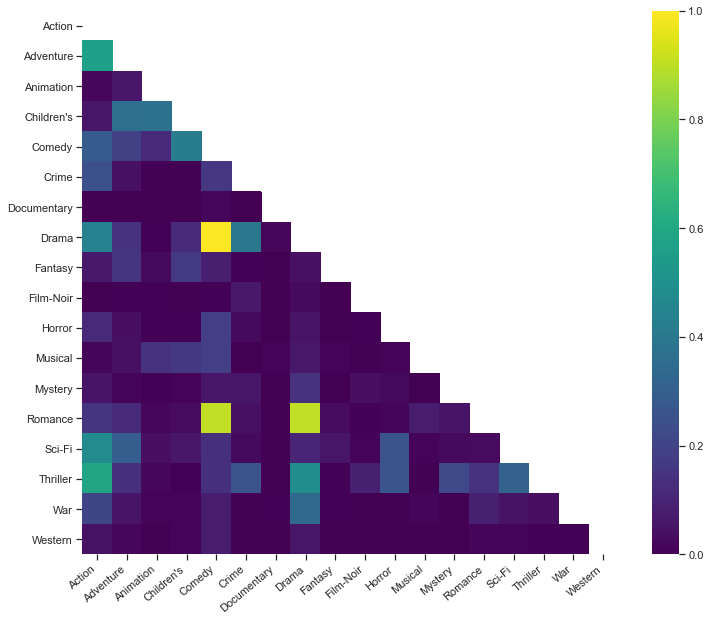

In [137]:
fig, ax = plt.subplots(1,1, figsize = (12,10))

mask = np.zeros_like(heatMap)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heatMap, mask = mask, cmap = "viridis", ax = ax)

ax.set_xticklabels(gen_list, rotation = 40, ha = "right");
ax.set_yticklabels(gen_list, rotation = 0);

### Por décadas

In [138]:
## Import
movies = pd.read_csv("movies_clean.csv", index_col = 0)

In [139]:
## Round
def myround(x, base=10):
    return int(base * np.floor(x/base))

In [140]:
## Rounded df
movies["año"] = movies["año"].apply(myround)

In [141]:
## Groupby Años
df = movies.groupby("año")
df_groupby = df.sum()
display(df_groupby)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
año,,,,,,,,,,,,,,,,,,
1910,1,1,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
1920,1,1,0,0,13,1,0,14,0,0,1,1,0,2,1,2,2,0
1930,3,6,2,4,23,4,1,26,0,1,7,11,5,15,1,9,5,1
1940,2,6,11,13,22,8,0,44,0,17,14,14,9,14,1,17,11,7
1950,10,13,5,10,25,7,1,62,4,9,20,17,7,18,32,16,13,7
1960,17,16,5,20,41,6,1,69,2,2,26,19,5,10,13,24,13,16
1970,41,26,8,25,63,17,2,84,4,1,35,9,6,8,31,22,11,15
1980,110,78,14,31,200,21,9,211,24,4,112,12,12,54,66,55,31,3
1990,299,130,52,139,743,139,105,1036,33,10,120,30,61,333,121,322,55,19


In [142]:
## Añadimos la columna #pelis
df_groupby["#pelis"] = df.count()["titulo"]

In [143]:
## Borramos 1910 (tan solo tenemos 1919) y 2000 (tan solo tenemos 2000)
df_groupby = df_groupby.drop([1910, 2000], axis = 0)

In [144]:
## Films Datset
df_groupby = df_groupby.T
display(df_groupby)

año,1920,1930,1940,1950,1960,1970,1980,1990
Action,1,3,2,10,17,41,110,299
Adventure,1,6,6,13,16,26,78,130
Animation,0,2,11,5,5,8,14,52
Children's,0,4,13,10,20,25,31,139
Comedy,13,23,22,25,41,63,200,743
Crime,1,4,8,7,6,17,21,139
Documentary,0,1,0,1,1,2,9,105
Drama,14,26,44,62,69,84,211,1036
Fantasy,0,0,0,4,2,4,24,33
Film-Noir,0,1,17,9,2,1,4,10


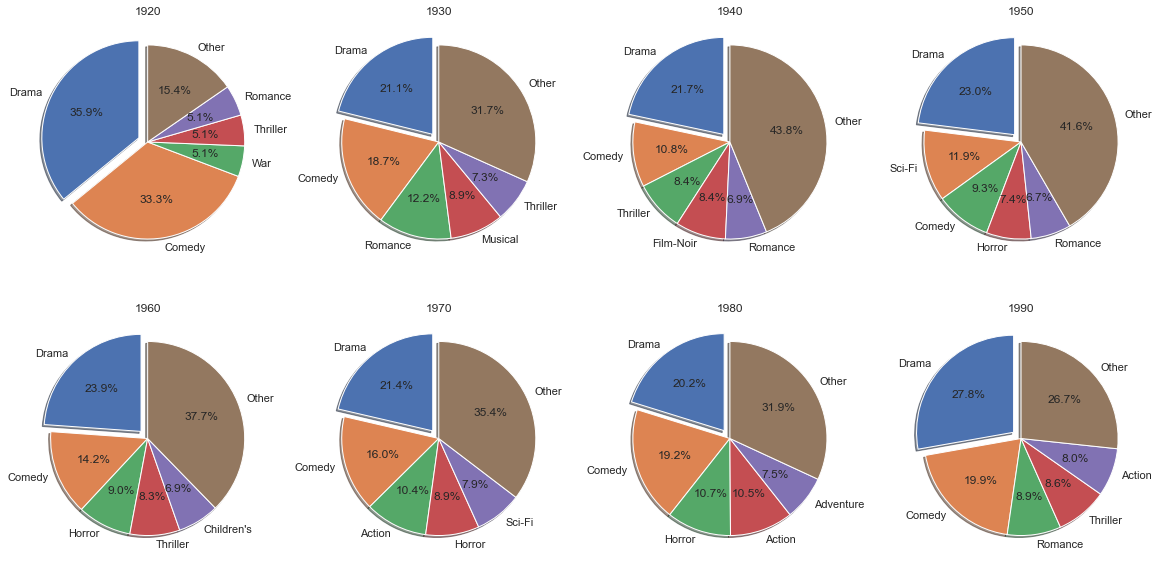

In [145]:
## Pie chart of Gen
fig, axes = plt.subplots(2, 4, figsize=(20,10));

for ii in enumerate(axes.flatten()):
    
    year = df_groupby.columns[ii[0]]
    column = df_groupby[year][:-2]
    column = column.sort_values(ascending = False)

    main_gen = list(column.head(5))
    other_gen = column.tail(len(column)-5).sum()
    main_gen.append(other_gen)

    main_lab = list(column.head(5).index)
    main_lab.append("Other")
    
    ii[1].set_title(year)
    ii[1].pie(main_gen, labels = main_lab, explode = [0.1, 0, 0, 0, 0, 0], autopct='%1.1f%%',
        shadow=True, startangle=90)

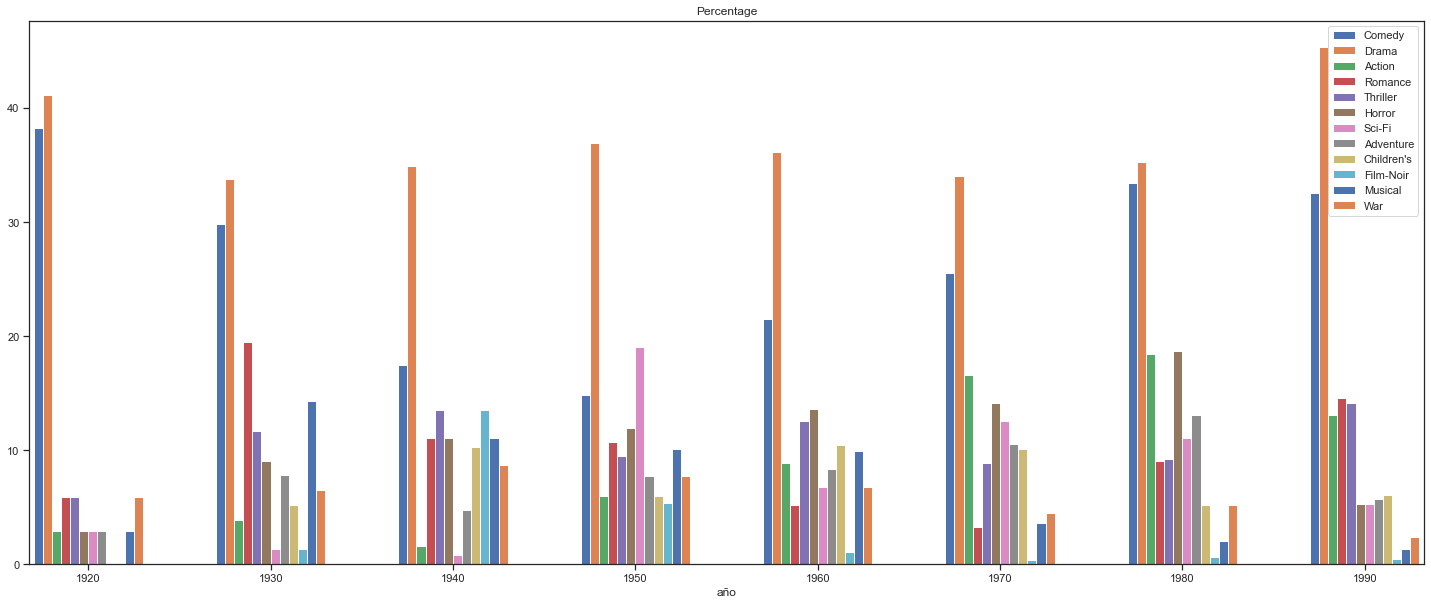

In [188]:
## Main gen
fig, ax1 = plt.subplots(1, 1, figsize=(25,10));


(df_groupby.iloc[0:-2].div(df_groupby.iloc[-1])*100).T.plot(y=["Comedy", "Drama", "Action", "Romance", "Thriller", "Horror", "Sci-Fi", 
                                                               "Adventure", "Children's", "Film-Noir", "Musical", "War"], kind="bar", width=6, ax = ax1);
ax1.set_title("Percentage");
ax1.legend(loc = "upper right");
plt.xticks(rotation=0);